# MultiVariate Time Series Forecasting

# EDA



## Importing modules and dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('train.csv')
stores = pd.read_csv('stores.csv')
features = pd.read_csv('features.csv')

<ipython-input-24-3fda2c97476d>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


## Cleaning the Dataset

Since only markdowns have null values we replace null values with 0

In [ ]:
for i in range(1,6):
  features["MarkDown"+str(i)] = features["MarkDown"+str(i)].apply(lambda x: 0 if x < 0 else x)
  features["MarkDown"+str(i)].fillna(value=0,inplace=True)

In [ ]:
data = pd.merge(data,stores,on='Store',how='left')

In [ ]:
data = pd.merge(data,features,on=['Store','Date'],how='left')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data['Year'] = data['Date'].dt.isocalendar().year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

In [ ]:
data.sort_values(by=['Date'],inplace=True)

In [ ]:
data.set_index(data.Date, inplace=True)

In [ ]:
data['IsHoliday_x'].isin(data['IsHoliday_y']).all()

False

In [ ]:
data.drop(columns='IsHoliday_x',inplace=True)
data.rename(columns={"IsHoliday_y" : "IsHoliday"}, inplace=True)

In [ ]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Year,Month,Week
Date,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2010,2,5
2010-02-05,35,13,2010-02-05,46056.32,B,103681,27.19,2.784,0.00,0.00,0.0,0.00,0.00,135.352461,9.262,False,2010,2,5
2010-02-05,1,19,2010-02-05,1947.05,A,151315,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2010,2,5
2010-02-05,24,96,2010-02-05,12506.79,A,203819,22.43,2.954,0.00,0.00,0.0,0.00,0.00,131.527903,8.326,False,2010,2,5
2010-02-05,9,2,2010-02-05,24917.84,B,125833,38.01,2.572,0.00,0.00,0.0,0.00,0.00,214.655459,6.415,False,2010,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,25,10,2012-10-26,25195.37,B,128107,56.69,3.882,4805.66,84.19,0.0,1073.49,730.76,216.151590,7.293,False,2012,10,43
2012-10-26,8,85,2012-10-26,1703.84,A,155078,64.74,3.506,2679.05,20.38,6.0,384.25,1691.31,227.036936,5.124,False,2012,10,43
2012-10-26,25,11,2012-10-26,9121.50,B,128107,56.69,3.882,4805.66,84.19,0.0,1073.49,730.76,216.151590,7.293,False,2012,10,43


In [ ]:
data['Total_MarkDown'] = data['MarkDown1']+data['MarkDown2']+data['MarkDown3']+data['MarkDown4']+data['MarkDown5']
data.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1,inplace=True)

In [ ]:
data

,Store,Dept,Date,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Year,Month,Week,Total_MarkDown
Date,,,,,,,,,,,,,,,
2010-02-05,1,1,2010-02-05,24924.50,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,0.00
2010-02-05,35,13,2010-02-05,46056.32,B,103681,27.19,2.784,135.352461,9.262,False,2010,2,5,0.00
2010-02-05,1,19,2010-02-05,1947.05,A,151315,42.31,2.572,211.096358,8.106,False,2010,2,5,0.00
2010-02-05,24,96,2010-02-05,12506.79,A,203819,22.43,2.954,131.527903,8.326,False,2010,2,5,0.00
2010-02-05,9,2,2010-02-05,24917.84,B,125833,38.01,2.572,214.655459,6.415,False,2010,2,5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-10-26,25,10,2012-10-26,25195.37,B,128107,56.69,3.882,216.151590,7.293,False,2012,10,43,6694.10
2012-10-26,8,85,2012-10-26,1703.84,A,155078,64.74,3.506,227.036936,5.124,False,2012,10,43,4780.99
2012-10-26,25,11,2012-10-26,9121.50,B,128107,56.69,3.882,216.151590,7.293,False,2012,10,43,6694.10


In [ ]:
data=data[data['Weekly_Sales']>=0]

In [ ]:
data['IsHoliday'] = data['IsHoliday'].astype('int')

<ipython-input-38-8fdcbc3ff8c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['IsHoliday'] = data['IsHoliday'].astype('int')


## Label Encoding Type

In [ ]:
type_group = {'A':1, 'B': 2, 'C': 3}  # changing A,B,C to 1-2-3
data['Type'] = data['Type'].replace(type_group)

<ipython-input-39-c9cd46b68e23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Type'] = data['Type'].replace(type_group)


Grouping Deptartments into stores

In [ ]:
df = data

In [ ]:
df.reset_index(drop=True, inplace=True)
df = df.groupby(['Date', 'Store','IsHoliday']).mean().reset_index()
df

,Date,Store,IsHoliday,Dept,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Total_MarkDown
0,2010-02-05,1,0,43.616438,22516.313699,1.0,151315.0,42.31,2.572,211.096358,8.106,2010.0,2.0,5.0,0.00
1,2010-02-05,2,0,44.534247,29273.828219,1.0,202307.0,40.19,2.572,210.752605,8.324,2010.0,2.0,5.0,0.00
2,2010-02-05,3,0,40.615385,7101.880308,2.0,37392.0,45.71,2.572,214.424881,7.368,2010.0,2.0,5.0,0.00
3,2010-02-05,4,0,44.287671,29248.546164,1.0,205863.0,43.76,2.598,126.442065,8.623,2010.0,2.0,5.0,0.00
4,2010-02-05,5,0,39.645161,5115.695161,2.0,34875.0,39.70,2.572,211.653972,6.566,2010.0,2.0,5.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,2012-10-26,32,0,44.901408,17182.806901,1.0,203007.0,47.22,3.686,199.219532,7.557,2012.0,10.0,43.0,11630.34
5144,2012-10-26,33,0,46.772727,5766.616591,1.0,39690.0,73.70,4.301,131.193097,6.895,2012.0,10.0,43.0,1101.61
5145,2012-10-26,34,0,44.642857,13671.254429,1.0,158114.0,57.95,3.514,131.193097,8.839,2012.0,10.0,43.0,3083.82
5146,2012-10-26,35,0,43.287879,13108.395606,2.0,103681.0,58.99,3.882,142.762411,8.665,2012.0,10.0,43.0,7637.23


In [ ]:
df = df.drop(['Dept'], axis = 1)

In [ ]:
df

,Date,Store,IsHoliday,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Total_MarkDown
0,2010-02-05,1,0,22516.313699,1.0,151315.0,42.31,2.572,211.096358,8.106,2010.0,2.0,5.0,0.00
1,2010-02-05,2,0,29273.828219,1.0,202307.0,40.19,2.572,210.752605,8.324,2010.0,2.0,5.0,0.00
2,2010-02-05,3,0,7101.880308,2.0,37392.0,45.71,2.572,214.424881,7.368,2010.0,2.0,5.0,0.00
3,2010-02-05,4,0,29248.546164,1.0,205863.0,43.76,2.598,126.442065,8.623,2010.0,2.0,5.0,0.00
4,2010-02-05,5,0,5115.695161,2.0,34875.0,39.70,2.572,211.653972,6.566,2010.0,2.0,5.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,2012-10-26,32,0,17182.806901,1.0,203007.0,47.22,3.686,199.219532,7.557,2012.0,10.0,43.0,11630.34
5144,2012-10-26,33,0,5766.616591,1.0,39690.0,73.70,4.301,131.193097,6.895,2012.0,10.0,43.0,1101.61
5145,2012-10-26,34,0,13671.254429,1.0,158114.0,57.95,3.514,131.193097,8.839,2012.0,10.0,43.0,3083.82
5146,2012-10-26,35,0,13108.395606,2.0,103681.0,58.99,3.882,142.762411,8.665,2012.0,10.0,43.0,7637.23


## Data Visualization

### Weekly Sales Plot

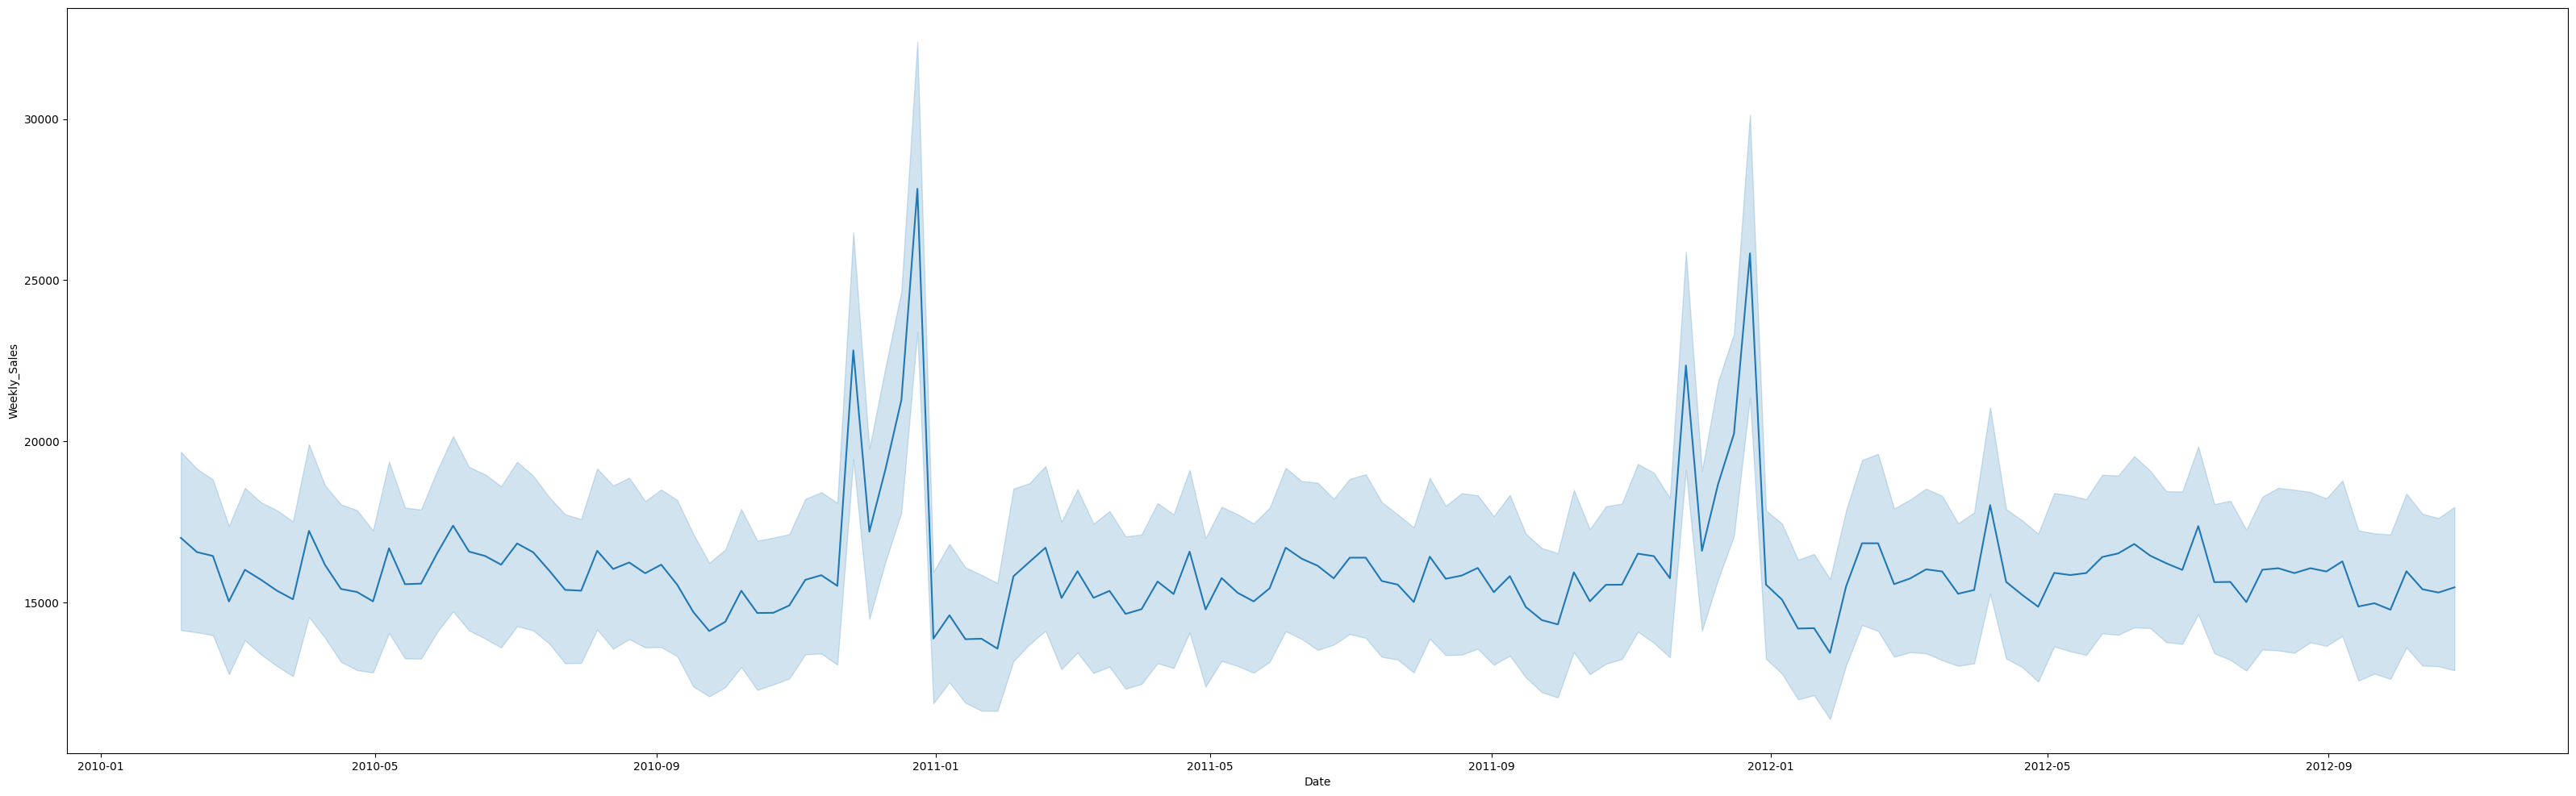

In [ ]:
plt.figure(figsize=(40,12))
sns.lineplot(x='Date', y = 'Weekly_Sales', data = df)
plt.show()

### Average Monthly Sales

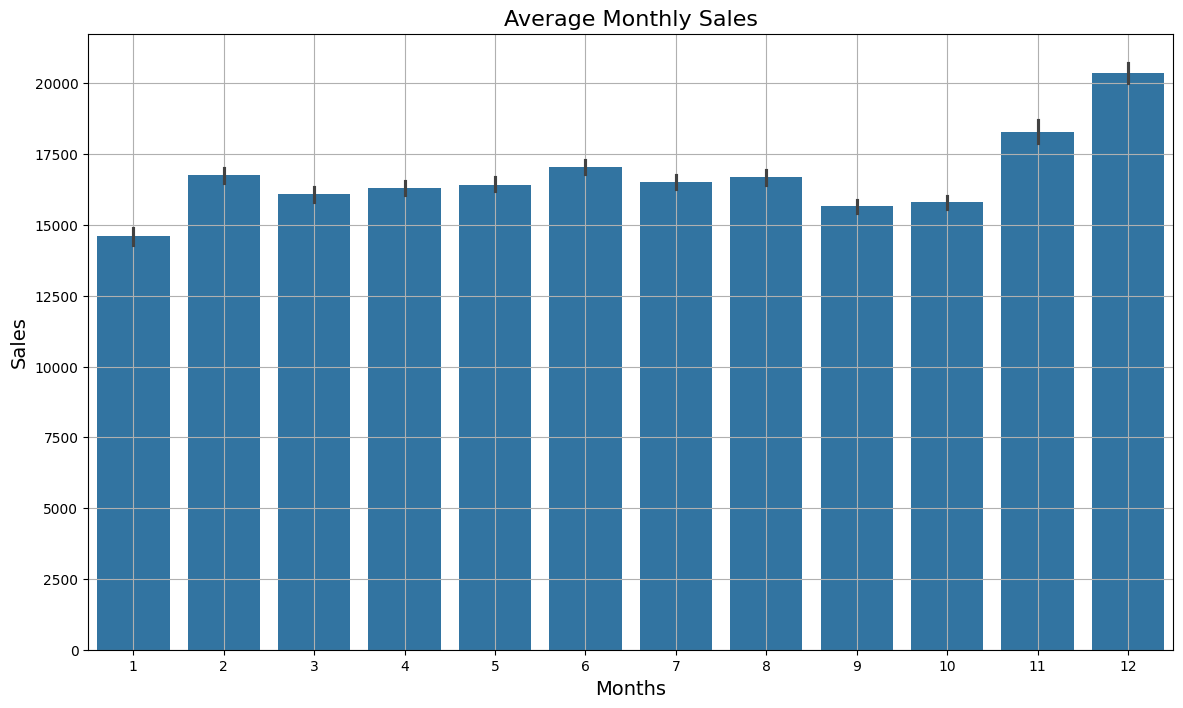

In [ ]:
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

### Monthly Sales per Year

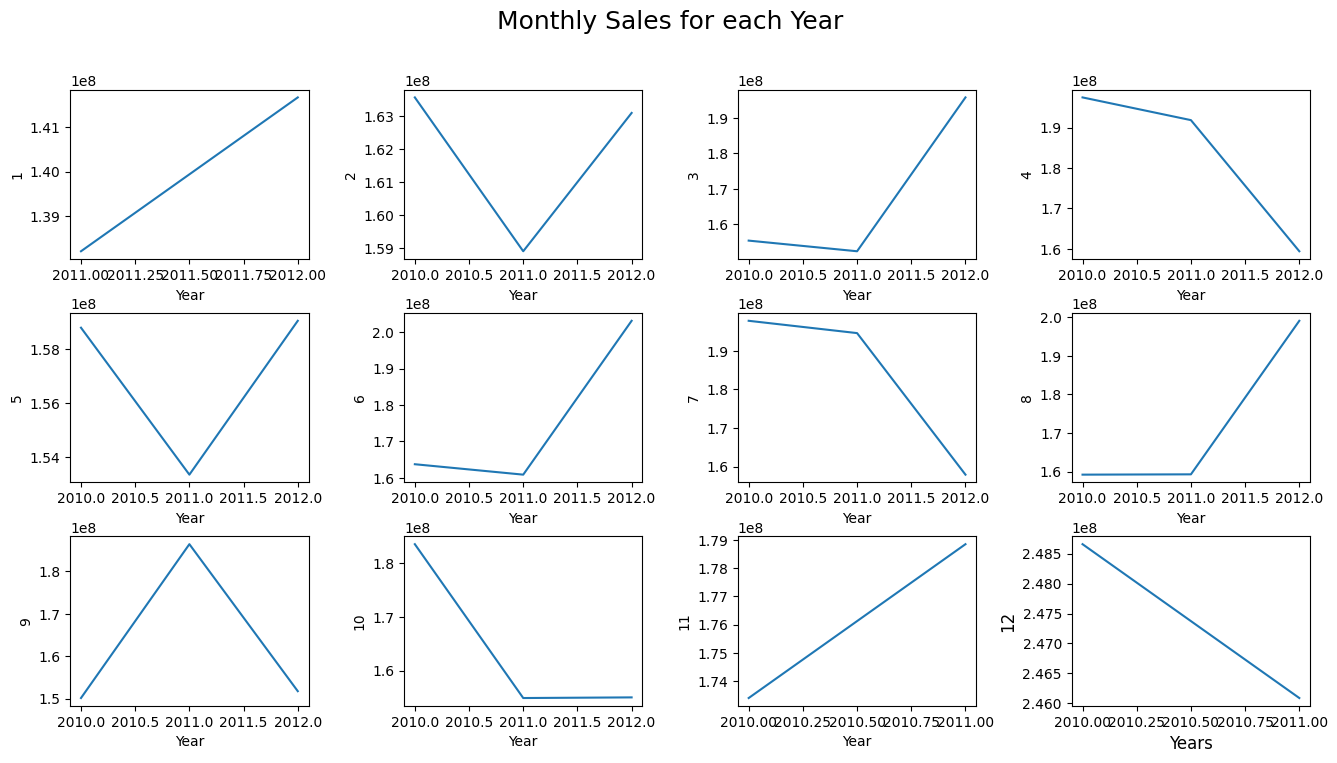

In [ ]:
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()

### Average Weekly Sales Storewise

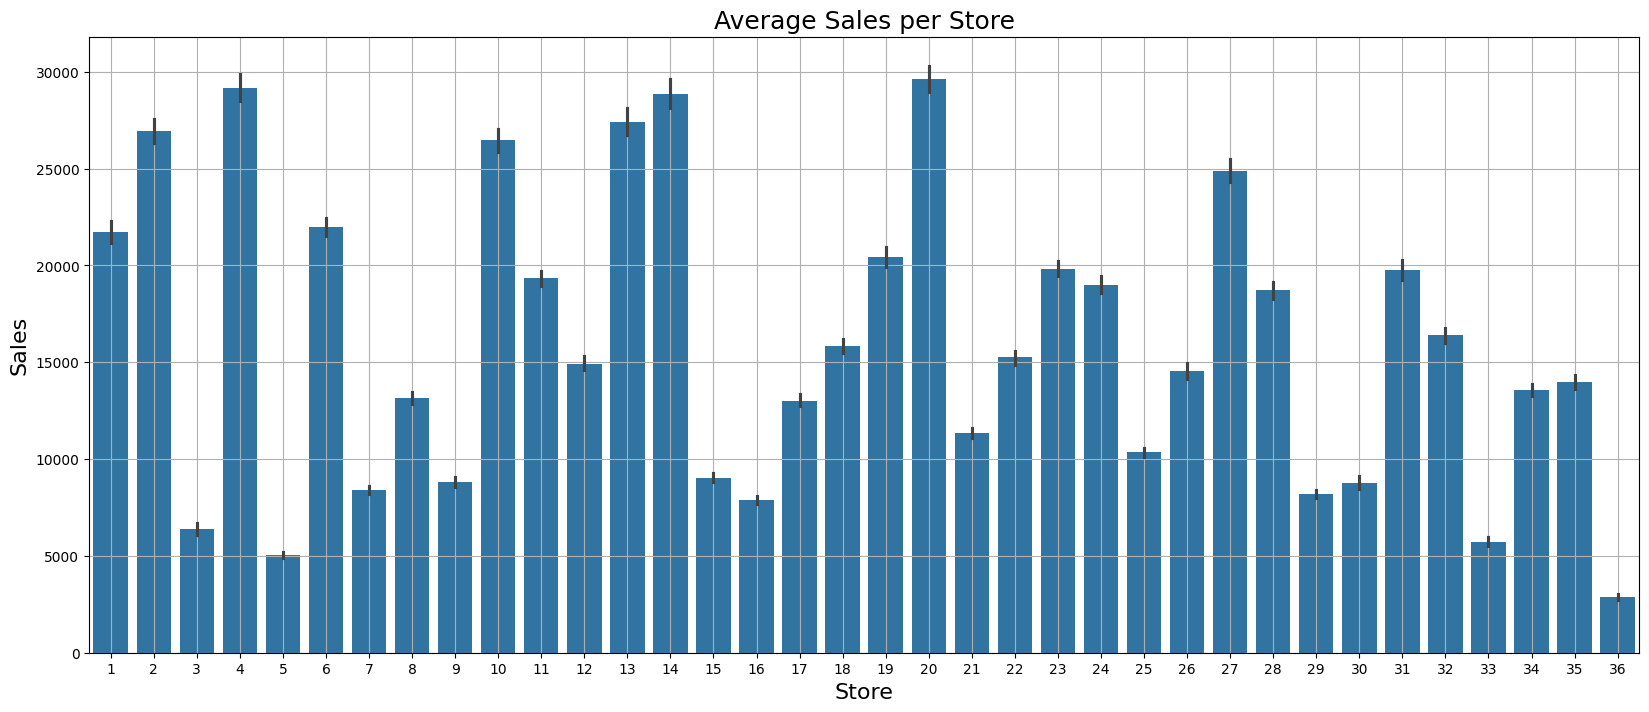

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.show()

### Sales vs Temperature

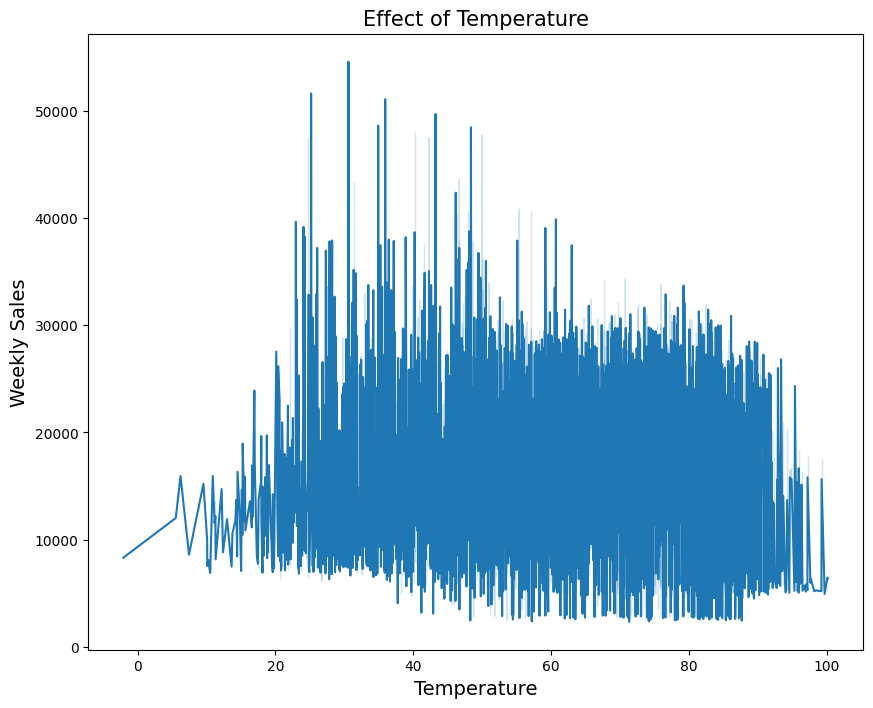

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Temperature', y = 'Weekly_Sales', data = df)
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Weekly Sales',fontsize=14)
plt.show()

### Sales vs Fuel Price

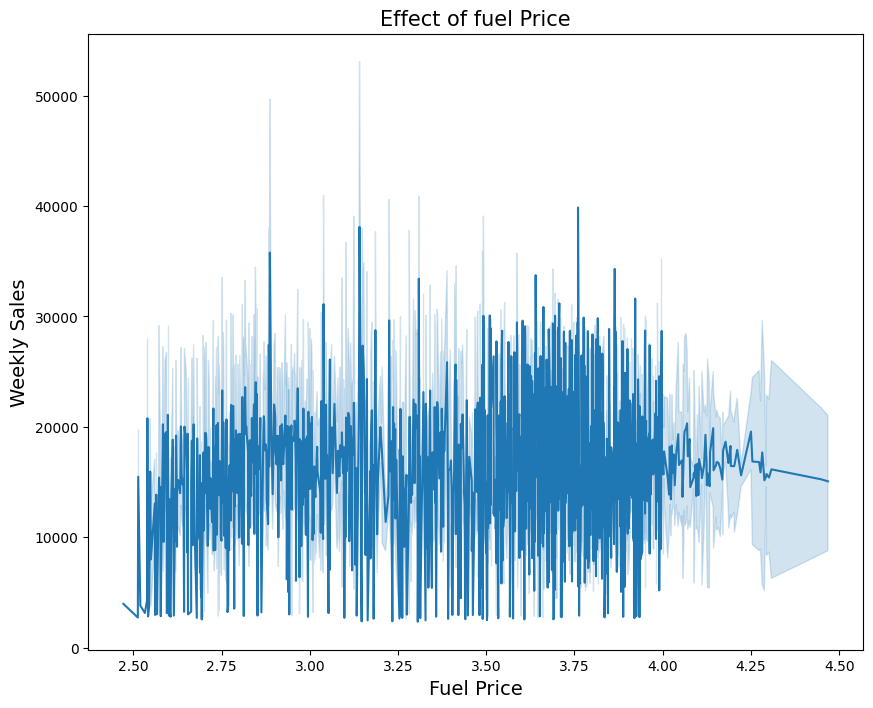

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Fuel_Price', y = 'Weekly_Sales', data = df)
plt.title('Effect of fuel Price',fontsize=15)
plt.xlabel('Fuel Price',fontsize=14)
plt.ylabel('Weekly Sales',fontsize=14)
plt.show()

### Sales vs CPI

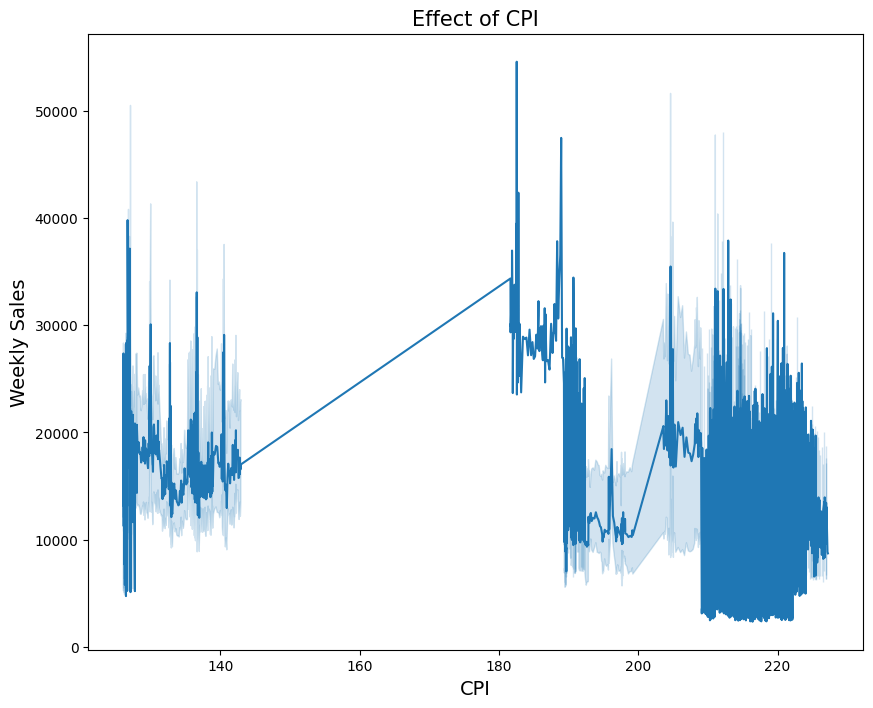

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='CPI', y = 'Weekly_Sales', data = df)
plt.title('Effect of CPI',fontsize=15)
plt.xlabel('CPI',fontsize=14)
plt.ylabel('Weekly Sales',fontsize=14)
plt.show()

### Sales vs Unemployment

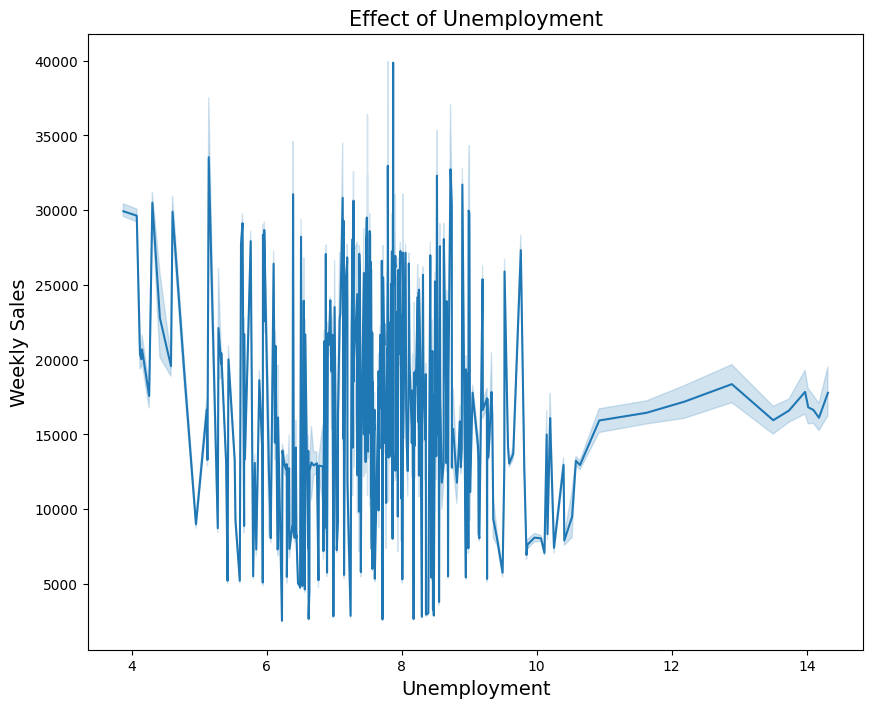

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Unemployment', y = 'Weekly_Sales', data = df)
plt.title('Effect of Unemployment',fontsize=15)
plt.xlabel('Unemployment',fontsize=14)
plt.ylabel('Weekly Sales',fontsize=14)
plt.show()

### Sales vs Total Markdown

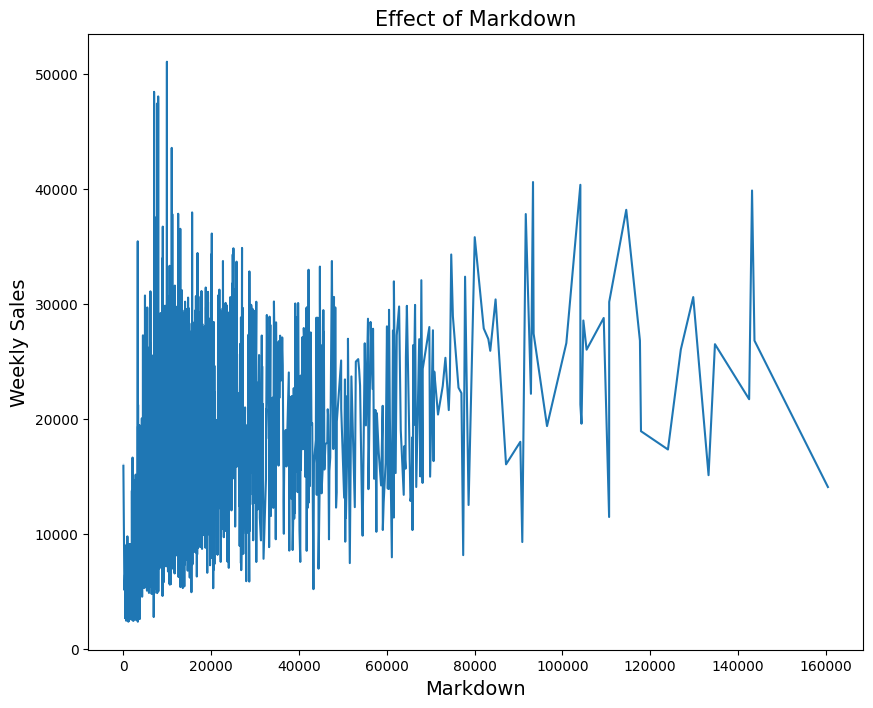

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Total_MarkDown', y = 'Weekly_Sales', data = df)
plt.title('Effect of Markdown',fontsize=15)
plt.xlabel('Markdown',fontsize=14)
plt.ylabel('Weekly Sales',fontsize=14)
plt.show()

## Normalizing Data

In [ ]:
columns_to_normalize = ['Weekly_Sales','Size','Temperature','Fuel_Price','CPI','Unemployment']

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler(feature_range=(0,10))
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
df

,Date,Store,IsHoliday,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,Total_MarkDown
0,2010-02-05,1,0,3.862425,1.0,6.302673,4.341487,0.501002,8.404998,4.051179,2010.0,2.0,5.0,0.00
1,2010-02-05,2,0,5.157040,1.0,9.062772,4.134051,0.501002,8.371019,4.260111,2010.0,2.0,5.0,0.00
2,2010-02-05,3,0,0.909303,2.0,0.136240,4.674168,0.501002,8.734004,3.343876,2010.0,2.0,5.0,0.00
3,2010-02-05,4,0,5.152197,1.0,9.255252,4.483366,0.631263,0.037370,4.546674,2010.0,2.0,5.0,0.00
4,2010-02-05,5,0,0.528786,2.0,0.000000,4.086106,0.501002,8.460115,2.575235,2010.0,2.0,5.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,2012-10-26,32,0,2.840623,1.0,9.100662,4.821918,6.082164,7.231036,3.525014,2012.0,10.0,43.0,11630.34
5144,2012-10-26,33,0,0.653491,1.0,0.260627,7.412916,9.163327,0.506984,2.890550,2012.0,10.0,43.0,1101.61
5145,2012-10-26,34,0,2.167874,1.0,6.670690,5.871820,5.220441,0.506984,4.753690,2012.0,10.0,43.0,3083.82
5146,2012-10-26,35,0,2.060041,2.0,3.724337,5.973581,7.064128,1.650549,4.586927,2012.0,10.0,43.0,7637.23


## Plotting Correlation Matrix

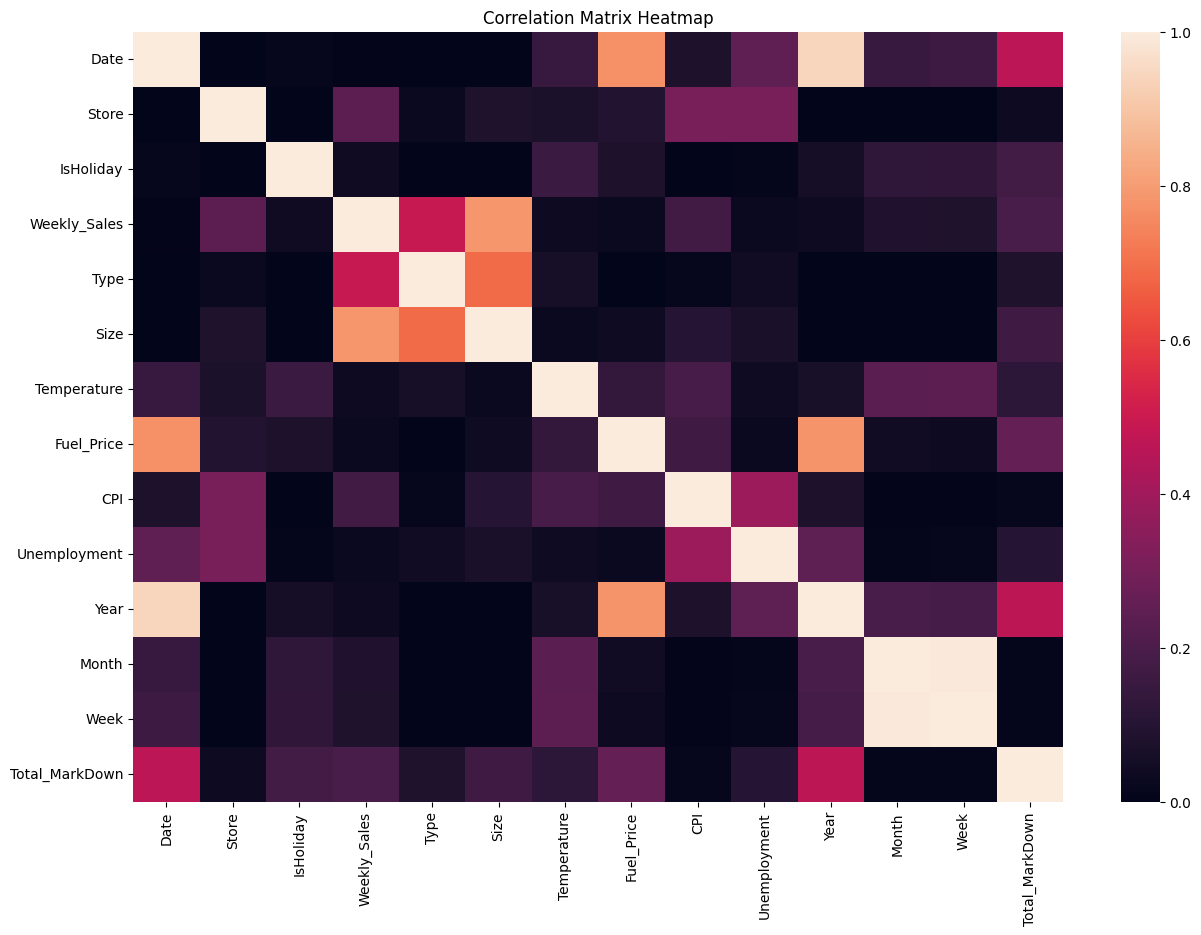

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr().abs())
plt.title('Correlation Matrix Heatmap')
plt.show()

## Saving Final Dataset

In [ ]:
df = df.drop(['Year','Week','Month'],axis=1)

In [ ]:
df

,Date,Store,IsHoliday,Weekly_Sales,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown
0,2010-02-05,1,0,3.862425,1.0,6.302673,4.341487,0.501002,8.404998,4.051179,0.00
1,2010-02-05,2,0,5.157040,1.0,9.062772,4.134051,0.501002,8.371019,4.260111,0.00
2,2010-02-05,3,0,0.909303,2.0,0.136240,4.674168,0.501002,8.734004,3.343876,0.00
3,2010-02-05,4,0,5.152197,1.0,9.255252,4.483366,0.631263,0.037370,4.546674,0.00
4,2010-02-05,5,0,0.528786,2.0,0.000000,4.086106,0.501002,8.460115,2.575235,0.00
...,...,...,...,...,...,...,...,...,...,...,...
5143,2012-10-26,32,0,2.840623,1.0,9.100662,4.821918,6.082164,7.231036,3.525014,11630.34
5144,2012-10-26,33,0,0.653491,1.0,0.260627,7.412916,9.163327,0.506984,2.890550,1101.61
5145,2012-10-26,34,0,2.167874,1.0,6.670690,5.871820,5.220441,0.506984,4.753690,3083.82
5146,2012-10-26,35,0,2.060041,2.0,3.724337,5.973581,7.064128,1.650549,4.586927,7637.23


In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

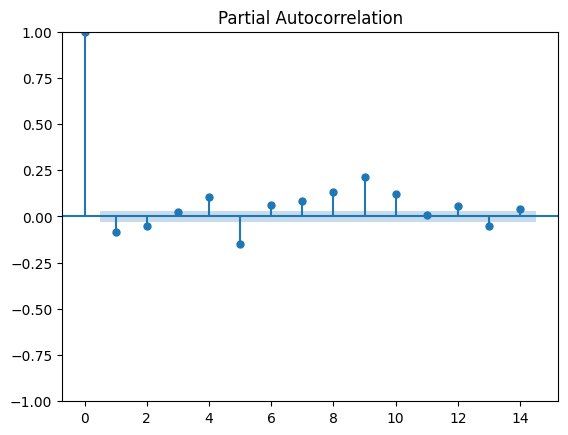

In [ ]:
plot_pacf(df['Weekly_Sales'].dropna(), lags=14)
plt.show()

# Model


## Loading Dataset and Packages

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# df = pd.read_csv("https://drive.google.com/uc?export=download&id=1-1x9Wj3xP4qjmWwXUowTSKueRzARk9fF")
df = df

In [ ]:
df = df[[col for col in df if col != 'Weekly_Sales'] + ['Weekly_Sales']]

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby(['Date']).mean().reset_index()
df = df.sort_values('Date')

In [ ]:
df = df.drop(['Store','Type'], axis = 1)

In [ ]:
df = df.assign(unique_id=pd.Series(1.0, index=df.index))

In [ ]:
df

,Date,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Total_MarkDown,Weekly_Sales,unique_id
0,2010-02-05,0.0,5.643523,3.426995,1.232047,4.131457,4.454241,0.000000,2.805676,1.0
1,2010-02-12,1.0,5.643523,3.450995,1.118069,4.140855,4.454241,0.000000,2.721218,1.0
2,2010-02-19,0.0,5.643523,3.808355,0.999638,4.145434,4.454241,0.000000,2.698126,1.0
3,2010-02-26,0.0,5.643523,3.989074,1.070474,4.149210,4.454241,0.000000,2.427845,1.0
4,2010-03-05,0.0,5.643523,4.336676,1.298291,4.152986,4.454241,0.000000,2.615829,1.0
...,...,...,...,...,...,...,...,...,...,...
138,2012-09-28,0.0,5.643523,6.883426,6.945697,4.992807,3.214118,11171.823056,2.378532,1.0
139,2012-10-05,0.0,5.643523,6.595782,6.887108,5.005880,2.944753,11959.961667,2.607225,1.0
140,2012-10-12,0.0,5.643523,5.825207,7.102538,5.018954,2.944753,8086.483611,2.500123,1.0
141,2012-10-19,0.0,5.643523,6.097385,7.017925,5.020183,2.944753,5721.277778,2.480545,1.0


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
df = df.rename(columns={'Weekly_Sales': 'y'})
df = df.rename(columns={'Date': 'ds'})

In [ ]:
df_train = df[df['ds']<='2012-05-18']
df_test = df[df['ds']>'2011-04-29'].reset_index(drop=True)

In [ ]:
print(df_train.shape)
print(df_test.shape)

(120, 10)
(78, 10)


In [ ]:
n_time = len(df.ds.unique())
val_size = int(.2 * n_time)
test_size = int(.2 * n_time)

In [ ]:
%%capture
!pip install neuralforecast

In [ ]:
from neuralforecast.models import Informer,Autoformer,PatchTST
from neuralforecast.models import MLP
from neuralforecast.losses.pytorch import MQLoss, DistributionLoss
from sklearn.metrics import mean_absolute_error
from neuralforecast import NeuralForecast

## Training The Model

In [ ]:
class MAPELoss(nn.Module):
  def __init__(self):
    super(MAPELoss, self).__init__()

  def forward(self, y_pred, y_true):
    epsilon = 1e-9
    diff = torch.abs(y_pred - y_true)
    y_true_abs = torch.abs(y_true)
    mape = torch.mean(diff / (y_true_abs + epsilon)) * 100
    return mape

In [ ]:
horizon = 26
models = PatchTST(h=horizon,
                input_size=horizon*2,
                max_steps=1000,
                val_check_steps=100,
                early_stop_patience_steps=7,
                )
nf = NeuralForecast(
    models=[models],
    freq='W')
nf.fit(df,val_size = 26)

INFO:lightning_fabric.utilities.seed:Seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name         | Type              | Params | Mode 
-----------------------------------------------------------
0 | loss         | MAE               | 0      | train
1 | padder_train | ConstantPad1d     | 0      | train
2 | scaler       | TemporalNorm      | 0      | train
3 | model        | PatchTST_backbone | 420 K  | train
-----------------------------------------------------------
420 K     Trainable params
3         Non-trainable params
420 K     Total params
1.682     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

## Testing the Model

In [ ]:
x_test = df_test[0:52]
y_test = df_test[-26:].reset_index(drop=False)
forecasts = nf.predict(x_test)

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


In [ ]:
y_pred = forecasts.reset_index(drop=False)

In [ ]:
y_pred

,unique_id,ds,PatchTST
0,1.0,2012-04-29,2.530317
1,1.0,2012-05-06,2.462220
2,1.0,2012-05-13,2.436003
3,1.0,2012-05-20,2.526144
4,1.0,2012-05-27,2.734057
5,1.0,2012-06-03,2.705049
6,1.0,2012-06-10,2.620470
7,1.0,2012-06-17,2.606132
8,1.0,2012-06-24,2.684543
9,1.0,2012-07-01,2.715433




```
# This is formatted as code
```

### Plotting the Results

In [ ]:
def plot_comparison():
  plt.figure(figsize=(20,5))
  sns.lineplot(
      x=y_test.index,
      y=y_pred['PatchTST'],
      label='PatchTST Prediction',
      color='blue'
  )
  sns.lineplot(
      x=y_test.index,
      y=y_test['y'],
      label='Actual Values',
      color='red'
  )
  plt.xlabel('Time')
  plt.ylabel('Values')
  plt.title('PatchTST Prediction vs. Actual Values')
  plt.legend()
  plt.grid()
  plt.show()

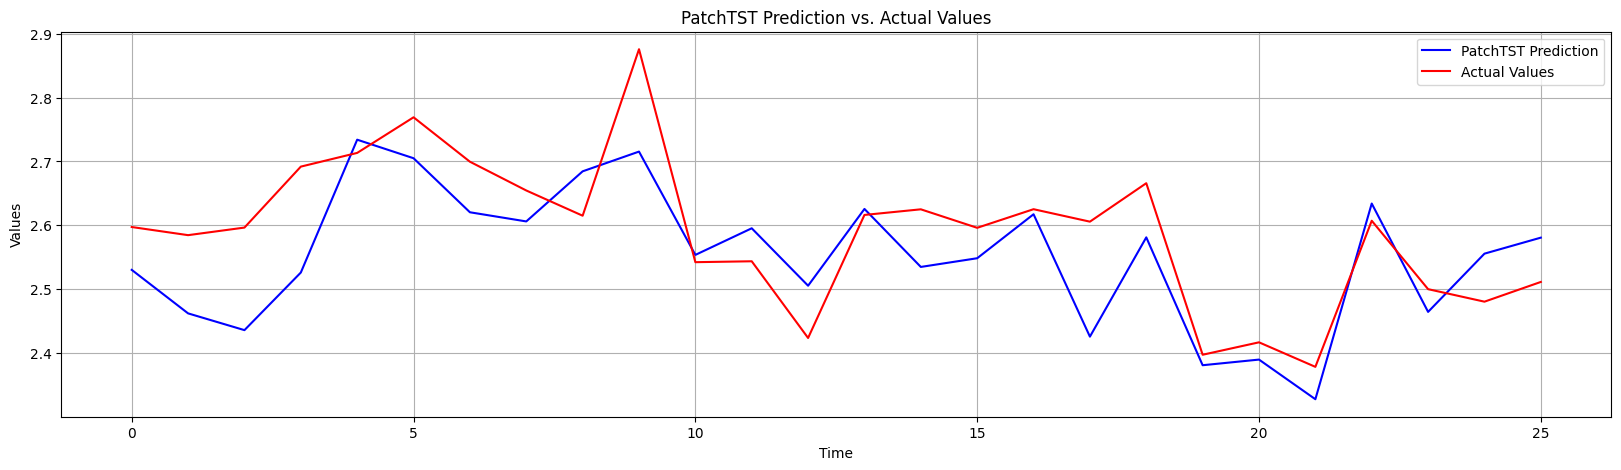

In [ ]:
plot_comparison()

In [ ]:
def HuberLoss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    small_error_loss = 0.5 * np.square(error)
    big_error_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, small_error_loss, big_error_loss)

In [ ]:
def plot_forecast_uncertainty():
  error = HuberLoss(y_test['y'], y_pred['PatchTST'])
  mean_error = np.mean(error)
  print(f'The mean error is {mean_error} and the maximum error is {np.max(error)}')
  for i in range(1, len(error)):
    error[i] = error[i] + error[i-1]
  error_df = pd.DataFrame({
      'ds': y_test.index,
      'error': error
  })
  plot_df = pd.DataFrame({
      'ds': y_pred['ds'],
      'y_pred': y_pred['PatchTST'],
      'y_pred_upper': y_pred['PatchTST'] + error_df['error'],
      'y_pred_lower': y_pred['PatchTST'] - error_df['error']
  })
  plt.figure(figsize=(14, 8))
  sns.set(style="whitegrid")
  sns.lineplot(x='ds', y='y_pred', data=plot_df, label='Predicted Values', color='blue', linewidth=2)
  plt.fill_between(plot_df['ds'], plot_df['y_pred_lower'], plot_df['y_pred_upper'], color='red', alpha=0.3, label='Uncertainty Range')
  plt.xlabel('Date', fontsize=14)
  plt.ylabel('Values', fontsize=14)
  plt.title('Forecast with Uncertainty Range', fontsize=16, fontweight='bold')
  plt.legend(fontsize=12)
  plt.xticks(rotation=45)
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.tight_layout()
  plt.show()

The mean error is 0.0036917656782397596 and the maximum error is 0.016191428601730357


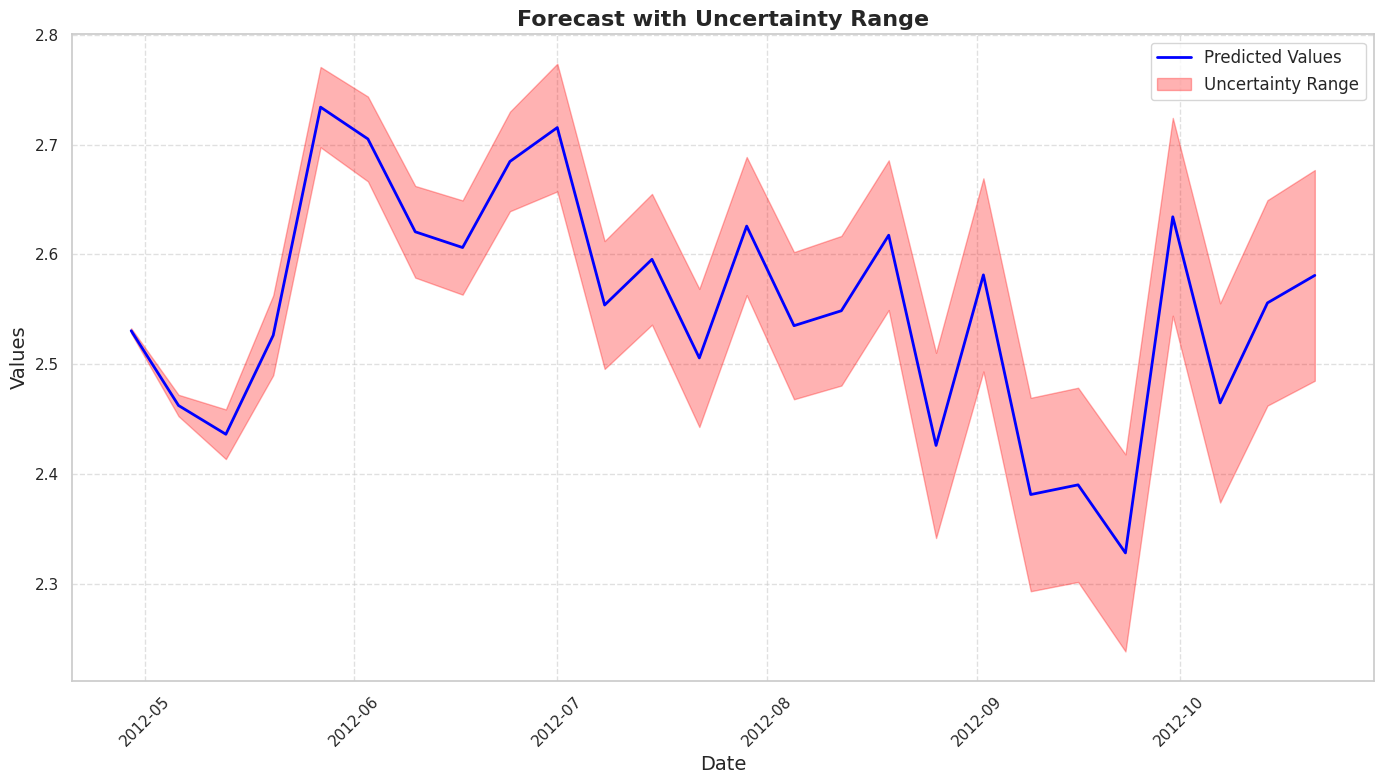

In [ ]:
plot_forecast_uncertainty()

### Blind Future Forecast

INFO:pytorch_lightning.utilities.rank_zero:Trainer already configured with model summary callbacks: [<class 'pytorch_lightning.callbacks.model_summary.ModelSummary'>]. Skipping setting a default `ModelSummary` callback.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/neuralforecast/core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


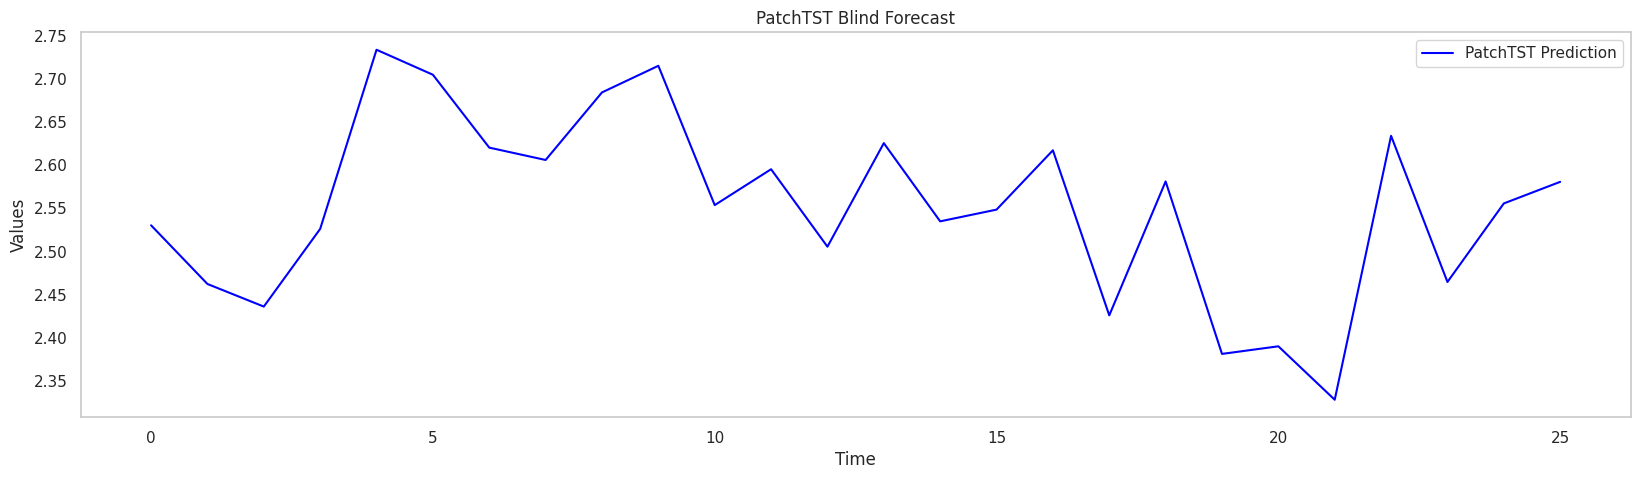

In [ ]:
blind_forecasts = nf.predict(df_test[-52:])
blind_forecasts = blind_forecasts.reset_index(drop=False)
plt.figure(figsize=(20,5))
sns.lineplot(
    x=y_test.index,
    y=y_pred['PatchTST'],
    label='PatchTST Prediction',
    color='blue'
)
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('PatchTST Blind Forecast')
plt.legend()
plt.grid()
plt.show()